#  基于轮廓系数寻找最佳n_clusters

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

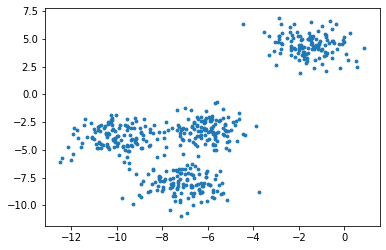

In [6]:
x,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
flg,ax1 = plt.subplots(1)
ax1.scatter(x[:,0],x[:,1],marker='o',s=8)
plt.show()

In [2]:
#知道每个聚出来的类的轮廓系数，还想要一个各个类之间的轮廓系数的对比
#知道聚类完之后图像的分布

For n_clusters =  4 The average silhouette_score is 0.6505186632729437


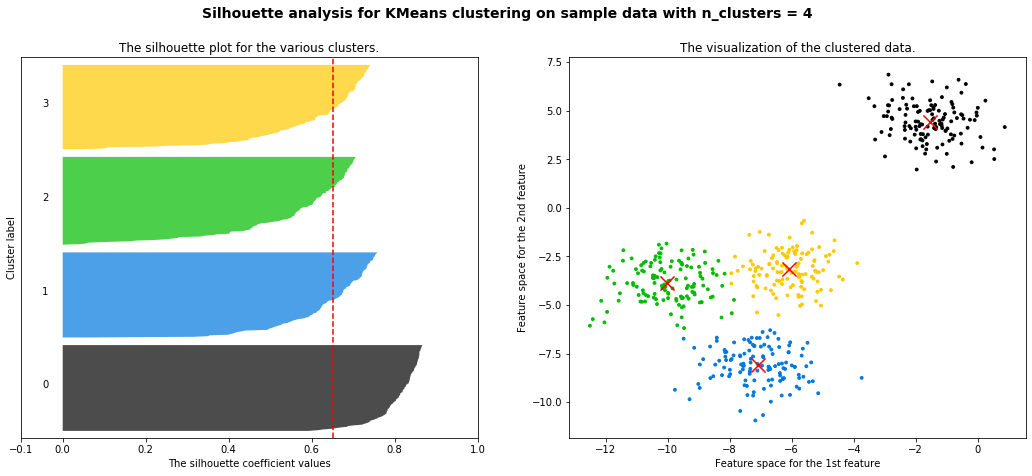

In [20]:
n_clusters = 4

fig,(ax1,ax2) = plt.subplots(1,2)

fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])#轮廓系数的取值范围为[-1,1]但我们希望轮廓系数大于0
ax1.set_ylim([0,x.shape[0] + (n_clusters + 1)*10])
#开始建模
cluster = KMeans(n_clusters=n_clusters,random_state=10).fit(x)
cluster_labels = cluster.labels_
#调用轮廓系数分数
silhouette_avg = silhouette_score(x,cluster_labels)
print("For n_clusters = ",n_clusters,
      "The average silhouette_score is",silhouette_avg)
sample_silhouette_values = silhouette_samples(x,cluster_labels)
#开始画图
y_lower = 10

for i in range(n_clusters):
    #从每个样本的轮廓系数中抽取出第i个簇的轮廓系数
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    #排序
    ith_cluster_silhouette_values.sort()
    #查看这一个簇中有多少样本
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    
    y_upper = y_lower + size_cluster_i
    
    #colormap库中的，使用小数来调用颜色的函数
    #在nipy_spetral([输入任意小数来代表一个颜色])
    #这里我们希望每个簇的颜色是不同的，需要的颜色种类刚好是循环个数的种类
    #只要能够确保每次循环生成的小数是不同的就可以
    #用i的浮点数除以n_clusters
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    #填充子图1
    ax1.fill_betweenx(np.arange(y_lower,y_upper),ith_cluster_silhouette_values,
                     facecolor=color,alpha=0.7)
    ax1.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    y_lower = y_upper + 10
ax1.set_title('The silhouette plot for the various clusters.')
ax1.set_xlabel('The silhouette coefficient values')
ax1.set_ylabel('Cluster label')
ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
ax1.set_yticks([])
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

#对第二个图处理
colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)

ax2.scatter(x[:,0],x[:,1],marker='o',s=8,c=colors)
centers = cluster.cluster_centers_

ax2.scatter(centers[:,0],centers[:,1],marker='x',c='red',alpha=1,s=200)
ax2.set_title('The visualization of the clustered data.')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(('Silhouette analysis for KMeans clustering on sample data '
             'with n_clusters = %d' % n_clusters),fontsize=14,fontweight='bold')
plt.show()

### 参数：初始质心的选择

    init：默认"k-means++"，选择聚类衷心的一种聪明的办法，能加速收敛。还可输入"random"或一个n维数组。如果输入n维数组，形状应为(n_clusters,n_features)
    
    random_state：控制每次质心随机初始化的随机种子
    
    n_init:整数，默认10，使用不同的质心随机初始化的种子来运行k-means算法的次数。结果会是基于Inertia来计算的n_init次连续运行后的最佳输出。

### 让迭代停下来
    
   max_iter:单次运行的k-means算法的最大迭代次数
   
   tol：浮点数，默认1e-4，两次迭代间Inertia下降的量，如果两次迭代间inertia下降的值小于tol，迭代停止。

# 聚类算法用于降维

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [4]:
china = load_sample_image('china.jpg')
china.shape

(427, 640, 3)

In [5]:
newimage = china.reshape((427*640,3))

In [6]:
newimage.shape

(273280, 3)

In [8]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape
#去除重复值

(96615, 3)

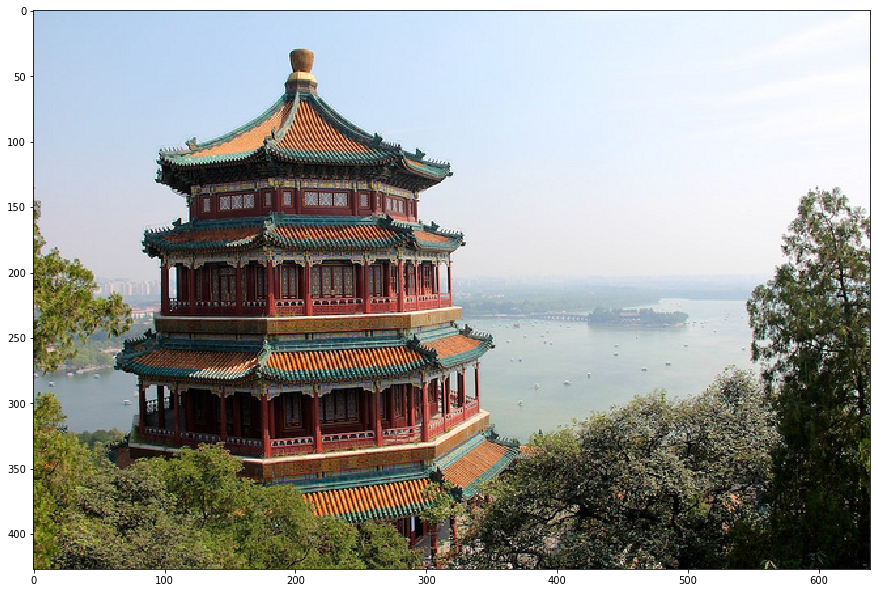

In [9]:
#可视化
plt.figure(figsize=(15,15))
plt.imshow(china)#imshow要使用三维数组

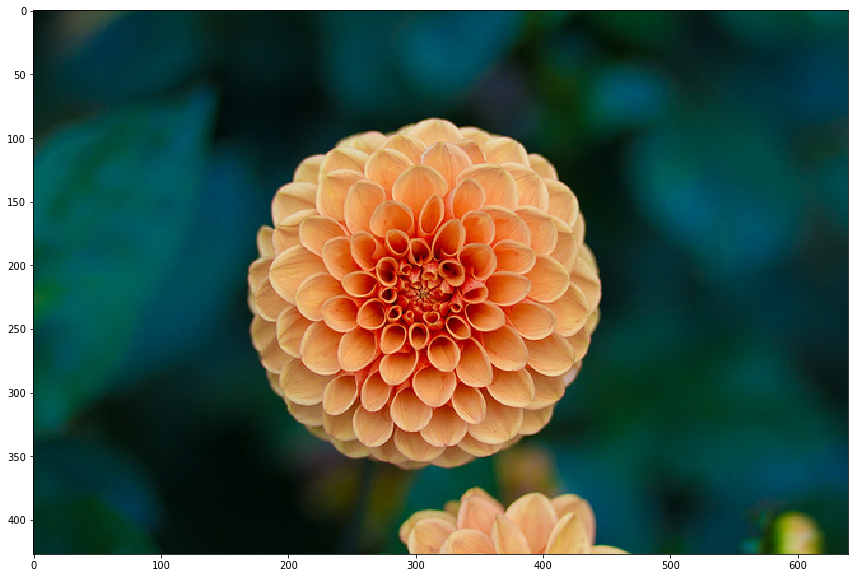

In [10]:
flower = load_sample_image('flower.jpg')
plt.figure(figsize=(20,10))
plt.imshow(flower)

###  接下来，将9W种颜色聚类成64类

In [11]:
n_clusters = 64
#plt.imshow()在浮点数上表现非常优异，所以这里把china中的数据转换成浮点数并亚索到[0,1]之间
china = np.array(china,dtype=np.float64)/china.max()
#把china从图像格式转换成矩阵格式
w,h,d = original_shape = tuple(china.shape)

In [12]:
w

427

In [13]:
h

640

In [14]:
d

3

In [15]:
assert d == 3

In [16]:
image_array = np.reshape(china,(w*h,d))
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [18]:
#建模
image_array_sample = shuffle(image_array,random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(image_array_sample)
kmeans.cluster_centers_.shape

(64, 3)

In [19]:
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [20]:
#使用质心来替换所有样本
image_kmeans = image_array.copy()

In [22]:
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [24]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [25]:
#恢复图片的结构
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [26]:
#随机矢量化
centroid_random = shuffle(image_array,random_state=0)[:n_clusters]

In [28]:
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)

In [29]:
labels_random.shape

(273280,)

In [30]:
#使用随机质心替换所有样本
image_random = image_array.copy()

In [31]:
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [32]:
#恢复图片结构
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

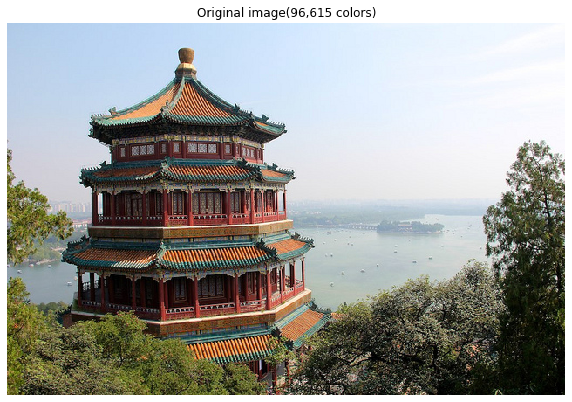

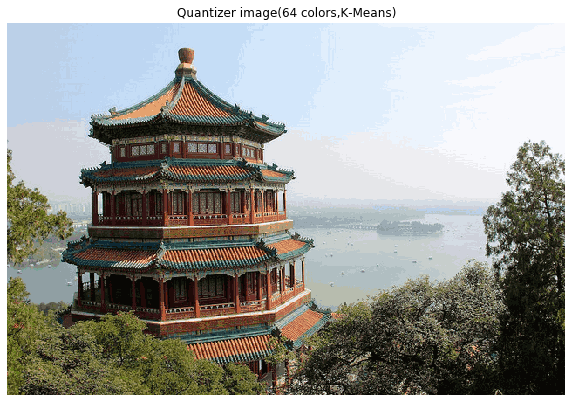

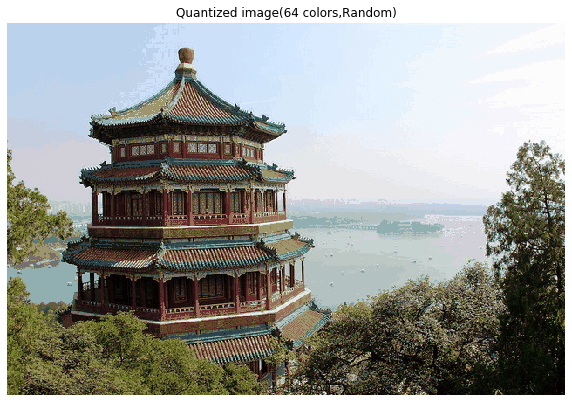

In [35]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image(96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantizer image(64 colors,K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image(64 colors,Random)')
plt.imshow(image_random)
plt.show()